Name: Mariam Valladares

Labpartner(s): Sarah Brannum

In [30]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime        #work with date
from datetime import datetime, timedelta
from matplotlib import colorbar, colors

#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

# Class 7.1

For today's lab you will need to download Davinci Resolve: https://www.blackmagicdesign.com/products/davinciresolve It will take some time

Today we are going to go over cartopy a bit more, Victoria is giving a demo on how to make movies, and you will start the Pandas course in Datacamp.

Note that due date for Lab 6.2 is on Thursday. Take your time and ask questions.

# Warmups 7.1

**W.1** Make a map of Antarctica using a polar projection in cartopy. Add a marker for McMurdo Station.

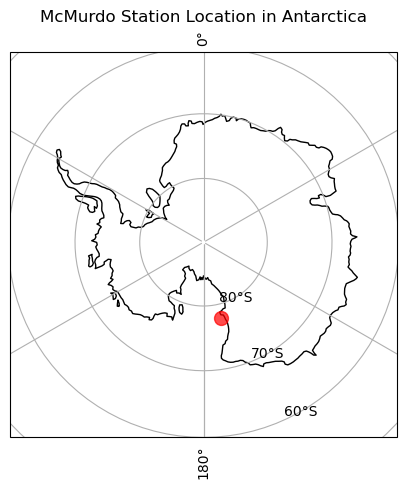

In [16]:
# McMurdo Station location

Long = 166.67 
Lat = -77.85

# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
ax.set_title("McMurdo Station Location in Antarctica")
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.plot(Long, Lat, marker='o', color='red', markersize=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.show()

# Lecture 7.1

### Agenda:

- Questions
- Go over some cartopy from last time (corrected lab)
- Movie demo from Victoria

### Questions

See movie demo script

# Lab 7.1

**E.1** Complete Data Manipulation with Pandas Ch 1-2 in datacamp. I'm assigning all of this course to the class, as many of you have .csv type data that works well with Pand


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [ ]:
#explore the dataset 

# show first few rows of dataset
df.head()

#show the column names
df.info()

#the number of rows and columns
df.shape

#summary statistics for numeric columns
df.describe()

In [ ]:
#subset the data

#sort the data
df.sort_values('column') #column to sort by from low to high, ascending = False (from high to low)
df.sort_values(['column1', 'column2']) #to sort multiple use list of variables

#subset columns
#zoom in into one column
df['column_name']

#to select more than one column need [[]]
df[['column1', 'column2']]

# subset rows
#by conditional value
df[df['column'] > 50]

#by text or date
df[df['column'] == 'labrador']  #df[df['column'] == '2001-12-02']

#subset based on multiple conditions

cond1 = (df['column'] == 'labrador')
cond2 = (df['column'] > 50)
df[cond1 & cond2]  # rows that meet both criteria

# in one row example
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

#subset categorical columns based on a list
condition = df['column'].isin(['name1', 'name2']) # after isin you add the list of values or categories to filter
df[condition]

#or in one line example
mojave_homelessness = homelessness[homelessness['state'].isin(["California", "Arizona", "Nevada", "Utah"])]

In [ ]:
# Add new columns
df['new_col'] = df['old_col'] /100

In [ ]:
#Summary stats
df['column'].mean() #.median, .min, .max, .mode, .var, .std, .sum, .quantile

#pass a list of functions using .agg
#define function
def pct40(column):
    return column.quantile(0.40)

df['column'].agg(pct40) # pases a function to one or multiple columns

#cumulative sum

df['column'].cumsum() #returns a number for each row  .cummax, .cummin, .cumprod


In [ ]:
#remove duplicates
df.drop_duplicates(subset = 'col_name')

#count
df['column'].value_counts()  #sort =true (high to low)

#group by categories
df.groupby('group_col')['col_to_sum'].mean()

#.agg to calculate multiple summary stats at once
df.groupby('group_col')['col_to_sum'].agg([median, mode, max, min])

#also groupby several df.groupby(['group_col', 'group_col2'])['col_to_sum'].agg()

#pivot table
df.pivot_table(values = 'column',  # column to summaerize
               index = 'group_column',#column to group
              aggfunc = [np.mean, np.median], #functions to run
              fill_value = 0) #replace na with zero

**E.3** Make an animation of some data using the methods that Victoria demonstrated. You can use some of the model data we have been looking at, or animate a plot of your data, or whatever you like. The goal here is to get familiar with the animation methods and tell a story using data. You will present this to the class next Tuesday (remember 10/17 is a holiday).

**Note** I am using the GOM data for 2001 20_archv.2001_001_01_2d.nc to plot another variable in the dataset 
barotropic_sea_water_x_velocity

In [19]:
# Read the data
#Open one of the files to see how the data looks like: 
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"
data = xr.open_dataset(link, decode_times=False)

In [21]:
#Evaluate the variable of interest barotropic_sea_water_y_velocity
data.v_barotropic_velocity[0,:,:] 

<xarray.DataArray 'v_barotropic_velocity' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
    MT         float64 3.653e+04
    Date       float64 ...
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
Attributes:
    standard_name:  barotropic_sea_water_y_velocity
    units:          m/s
    valid_range:    [-1.1112156  1.0321525]
    long_name:          baro. y-vel.   [01.6H]
    _ChunkSizes:    [  1 385 525]

In [24]:
date = datetime(2000,1,1) 

In [25]:
## Define time settings and location to save files
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 15 # How many days do we want to cycle through
date = datetime(2000,1,1) 

min_level = -1.25
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 0.901 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'C:/Users/Mariam Valladares/Dropbox/PC/Desktop/Aplicaciones/LSU Courses/Fall 2024/OCS 4001.1/Labs/Lab 7.1/barimetric_velocity/'
file_name = 'Golf_of_Mexico_velocity_'

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


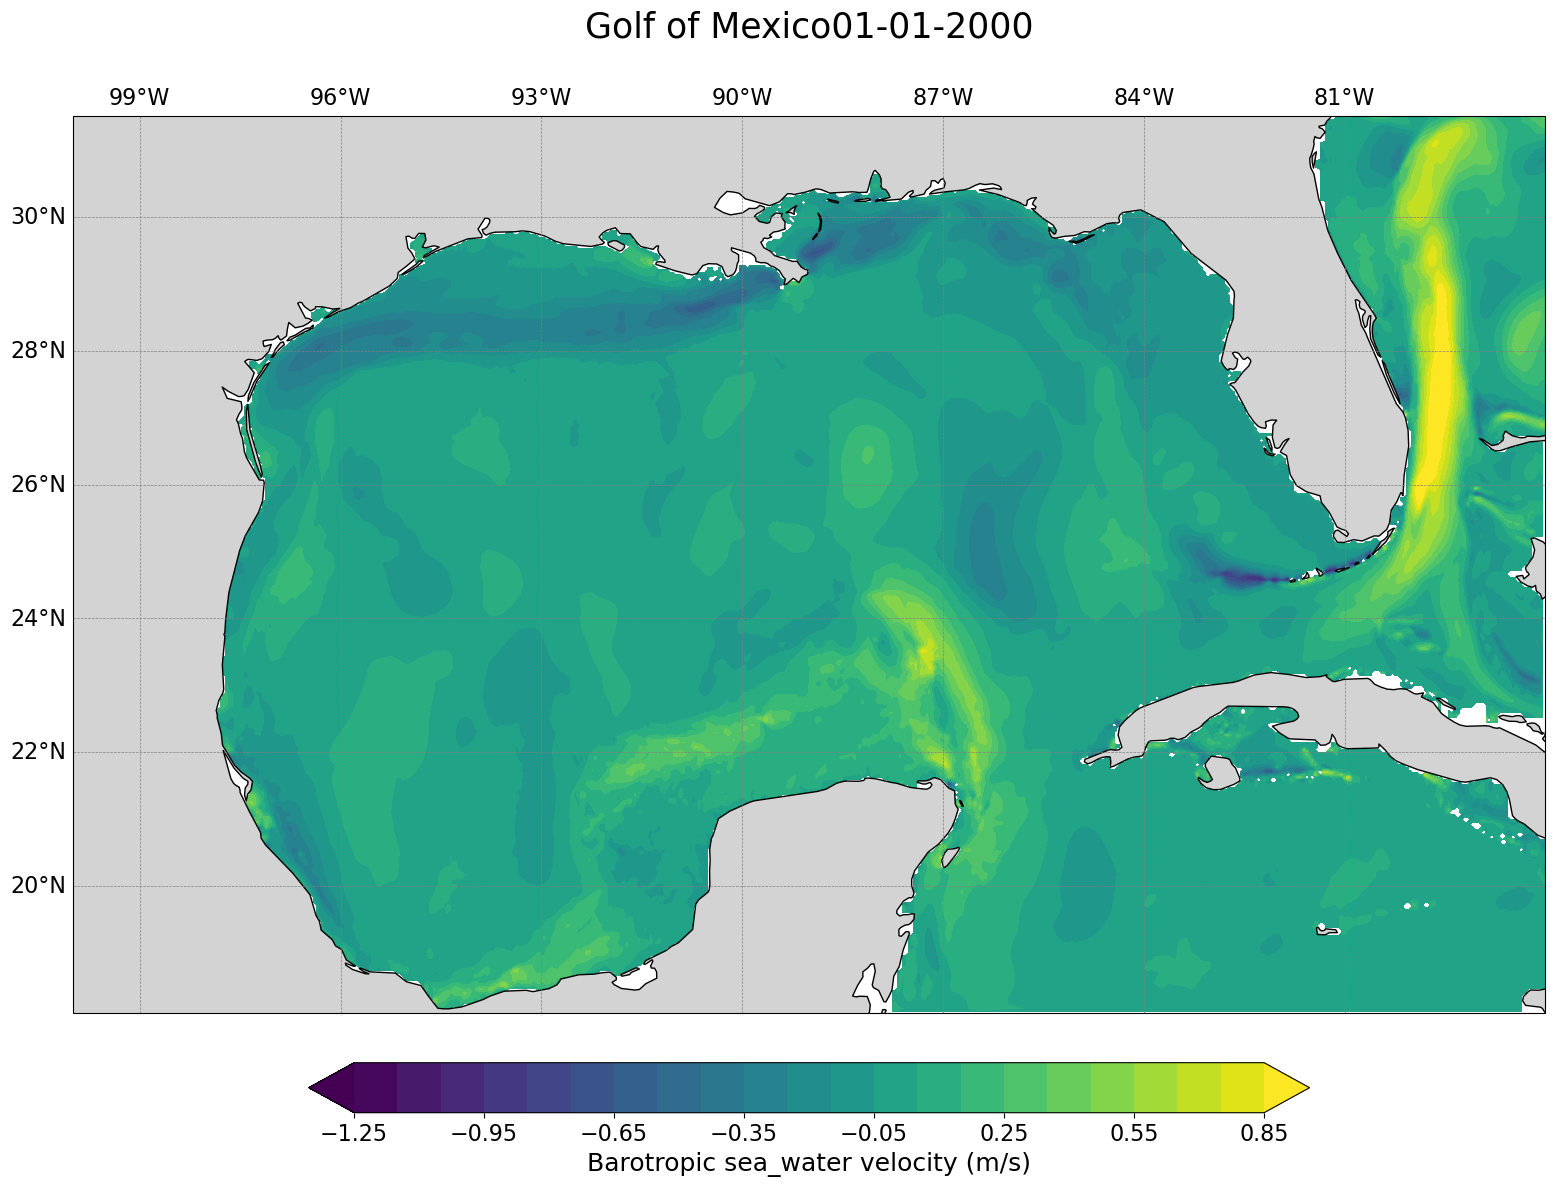

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


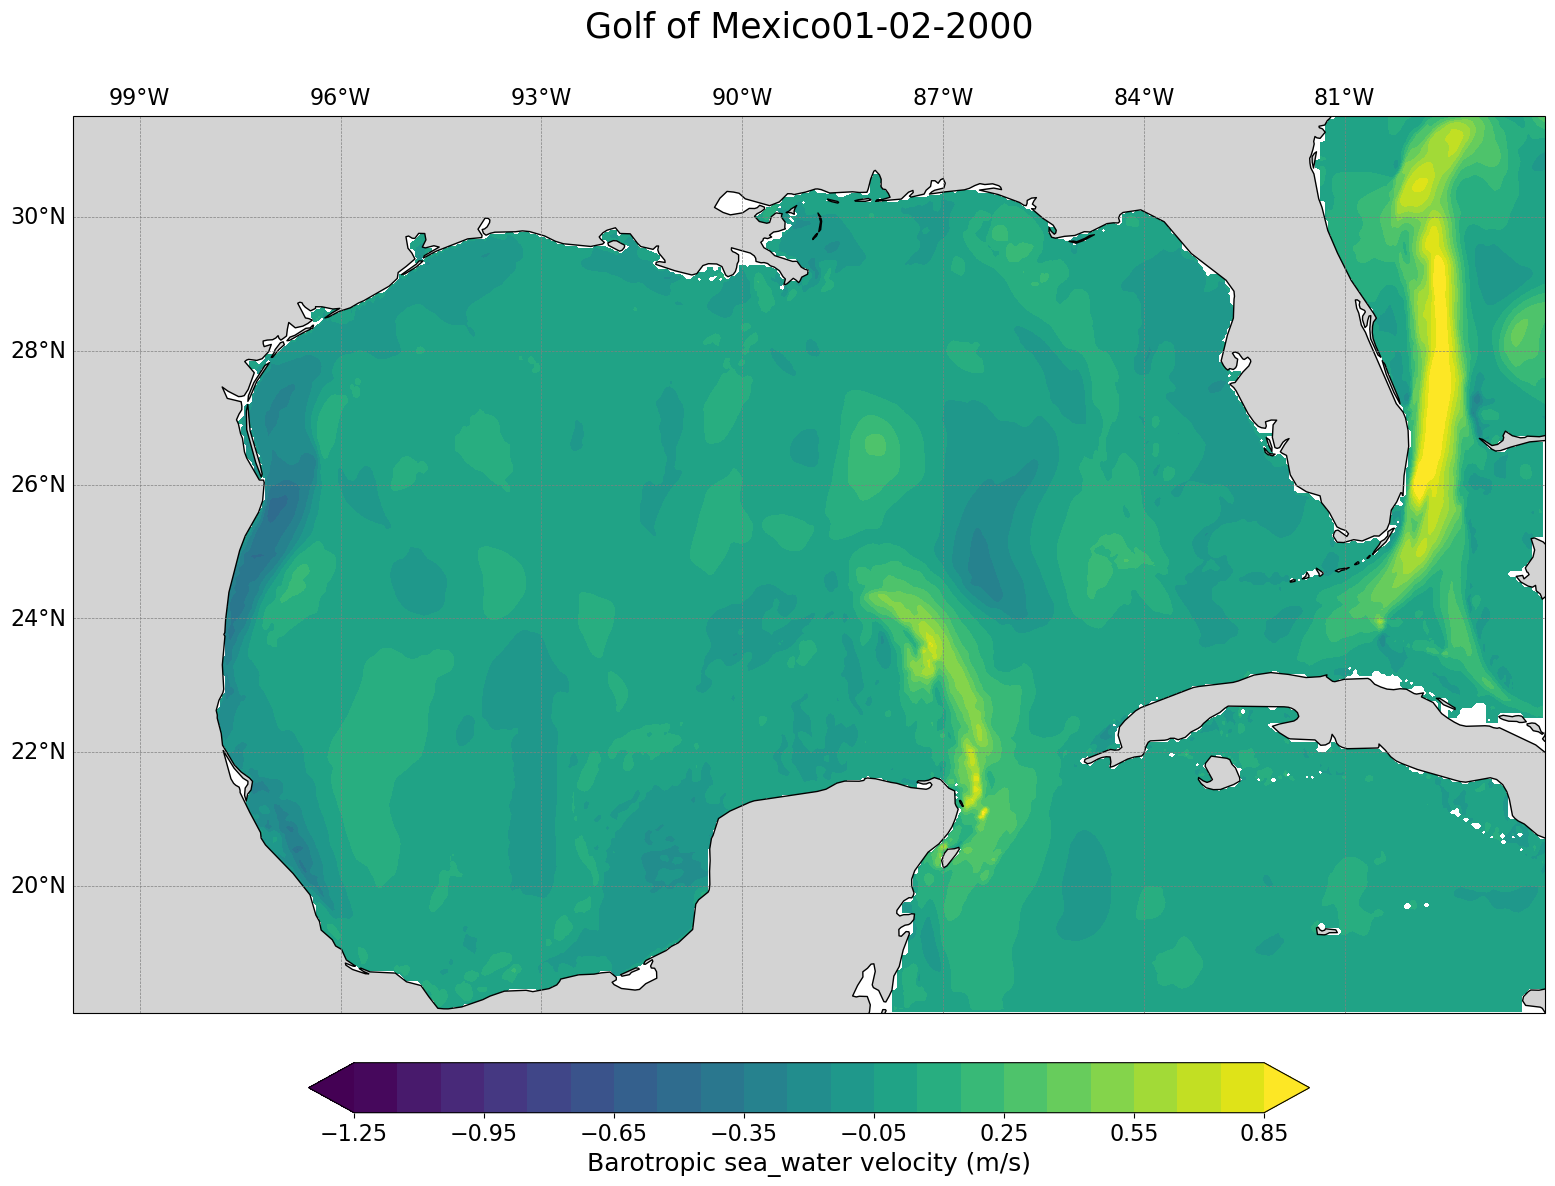

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


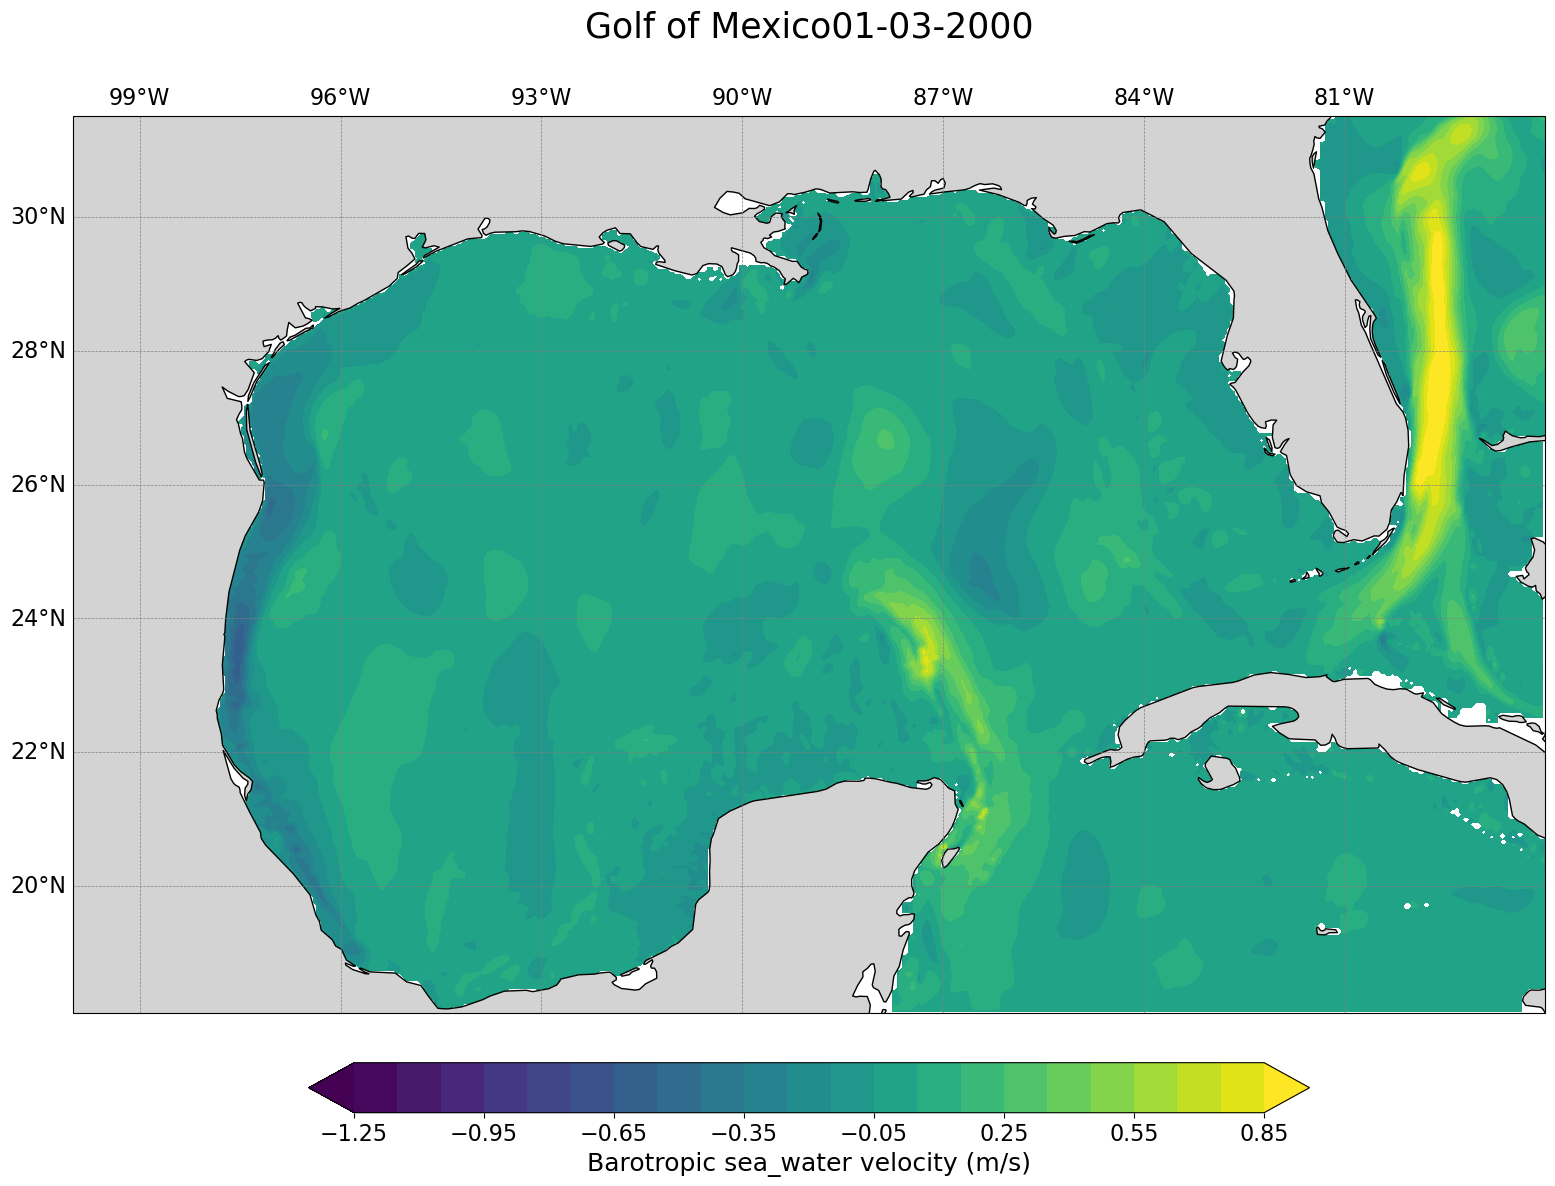

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


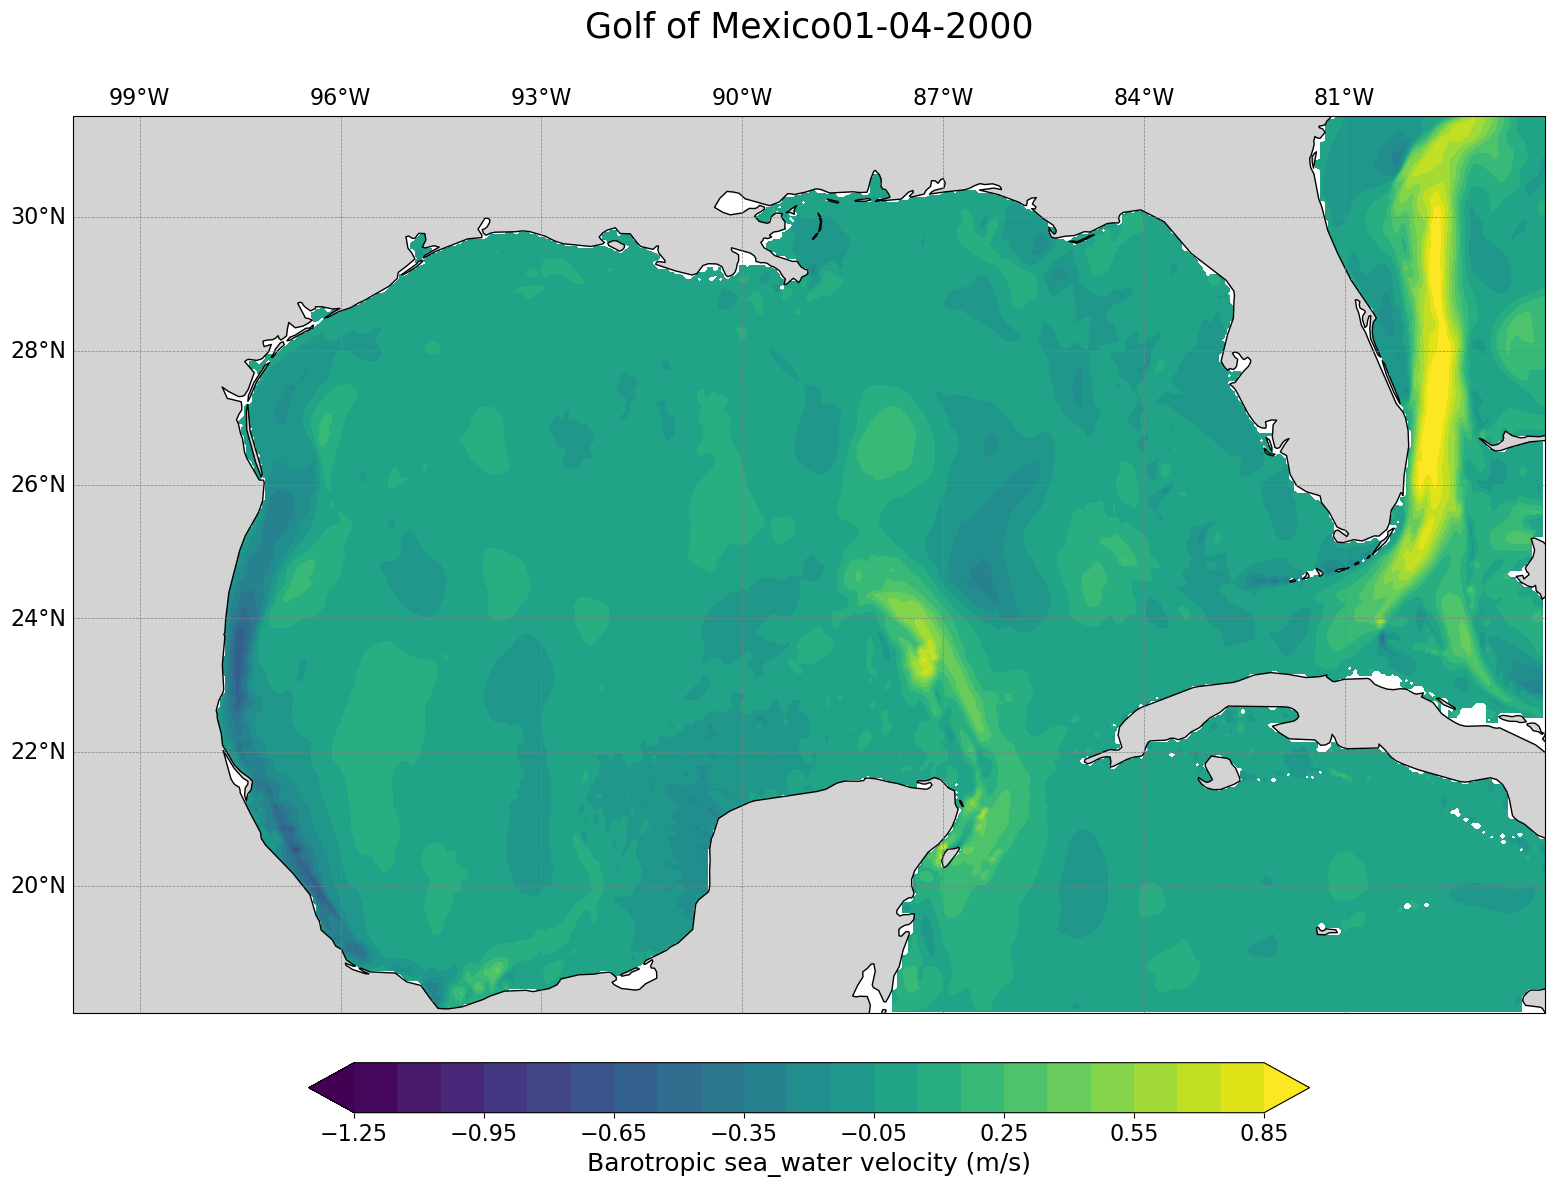

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


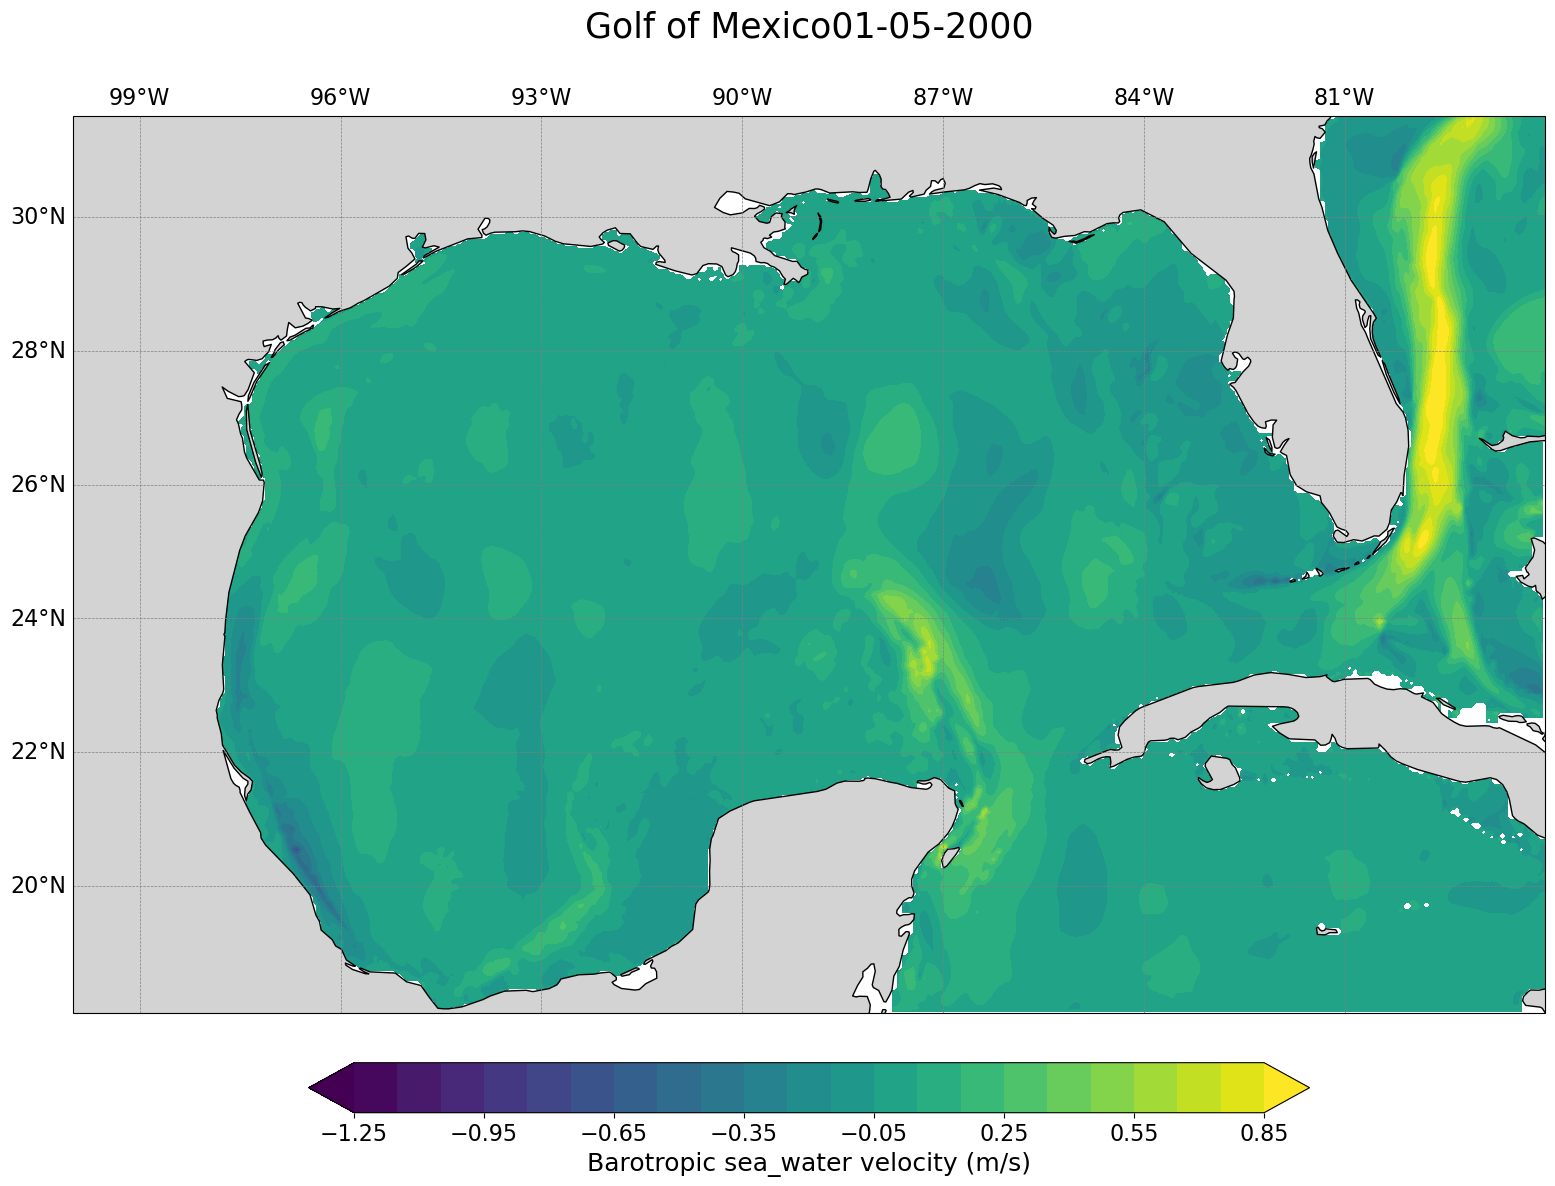

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


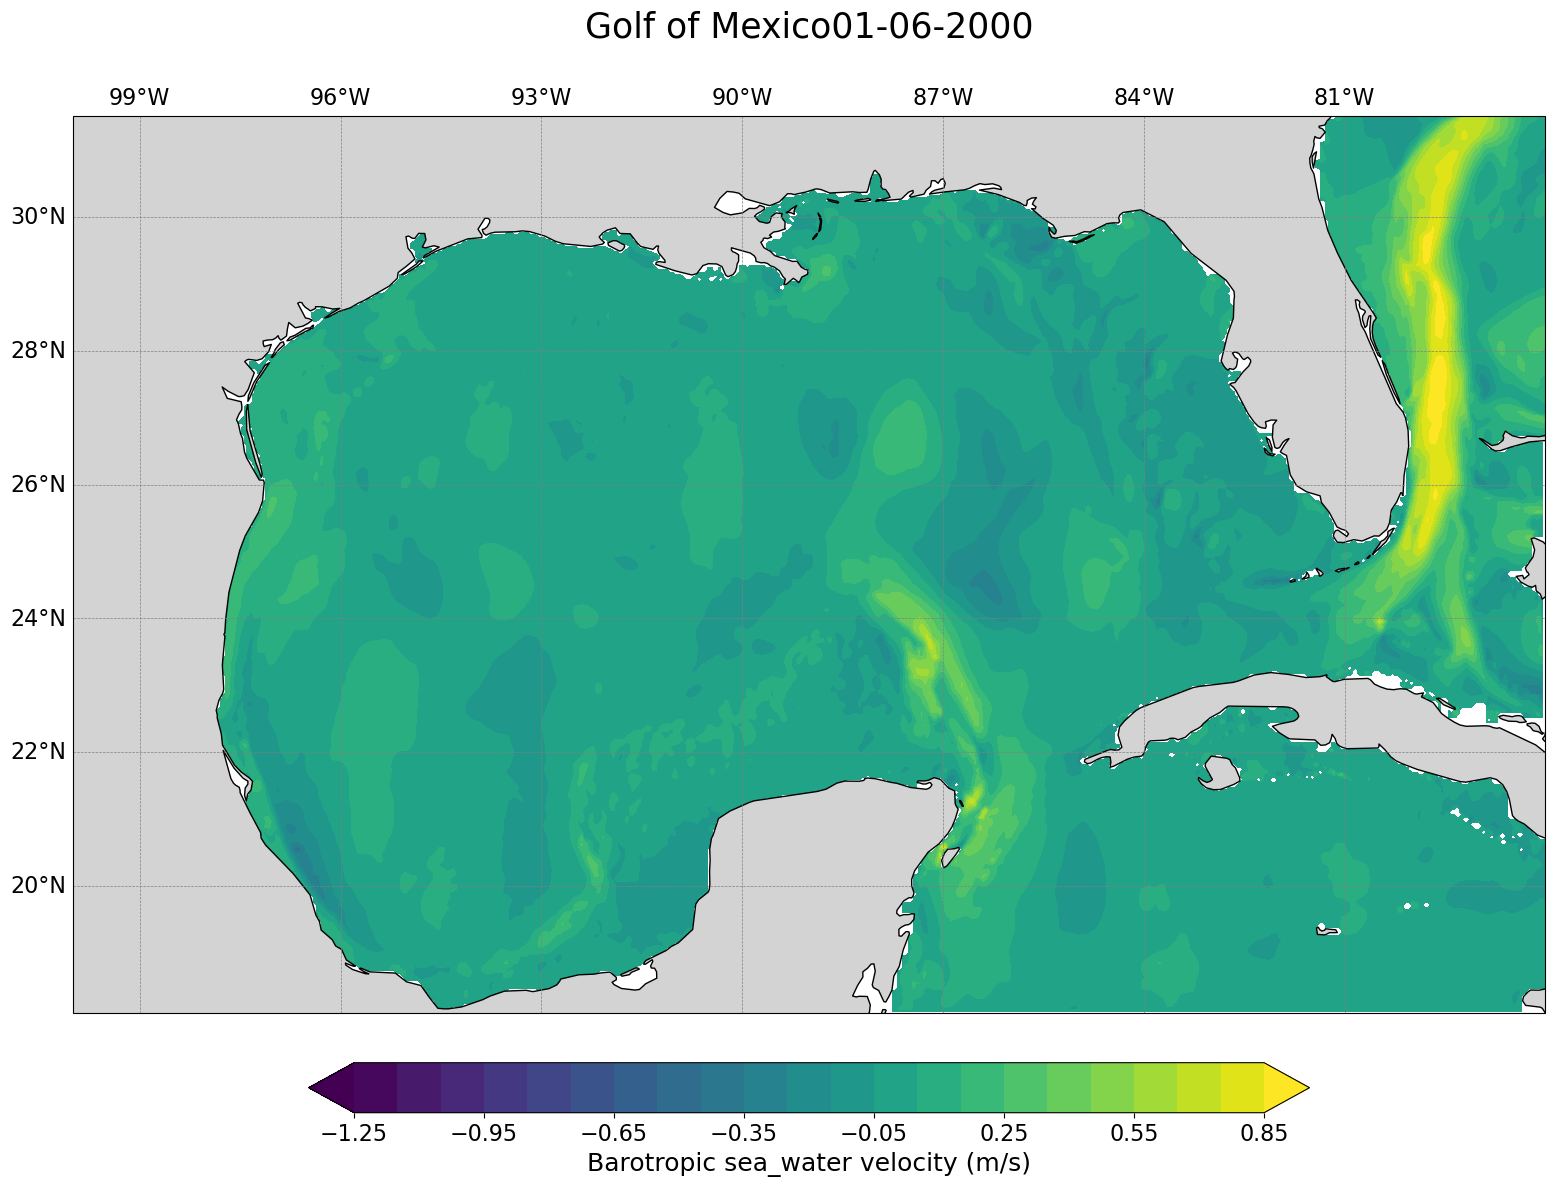

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


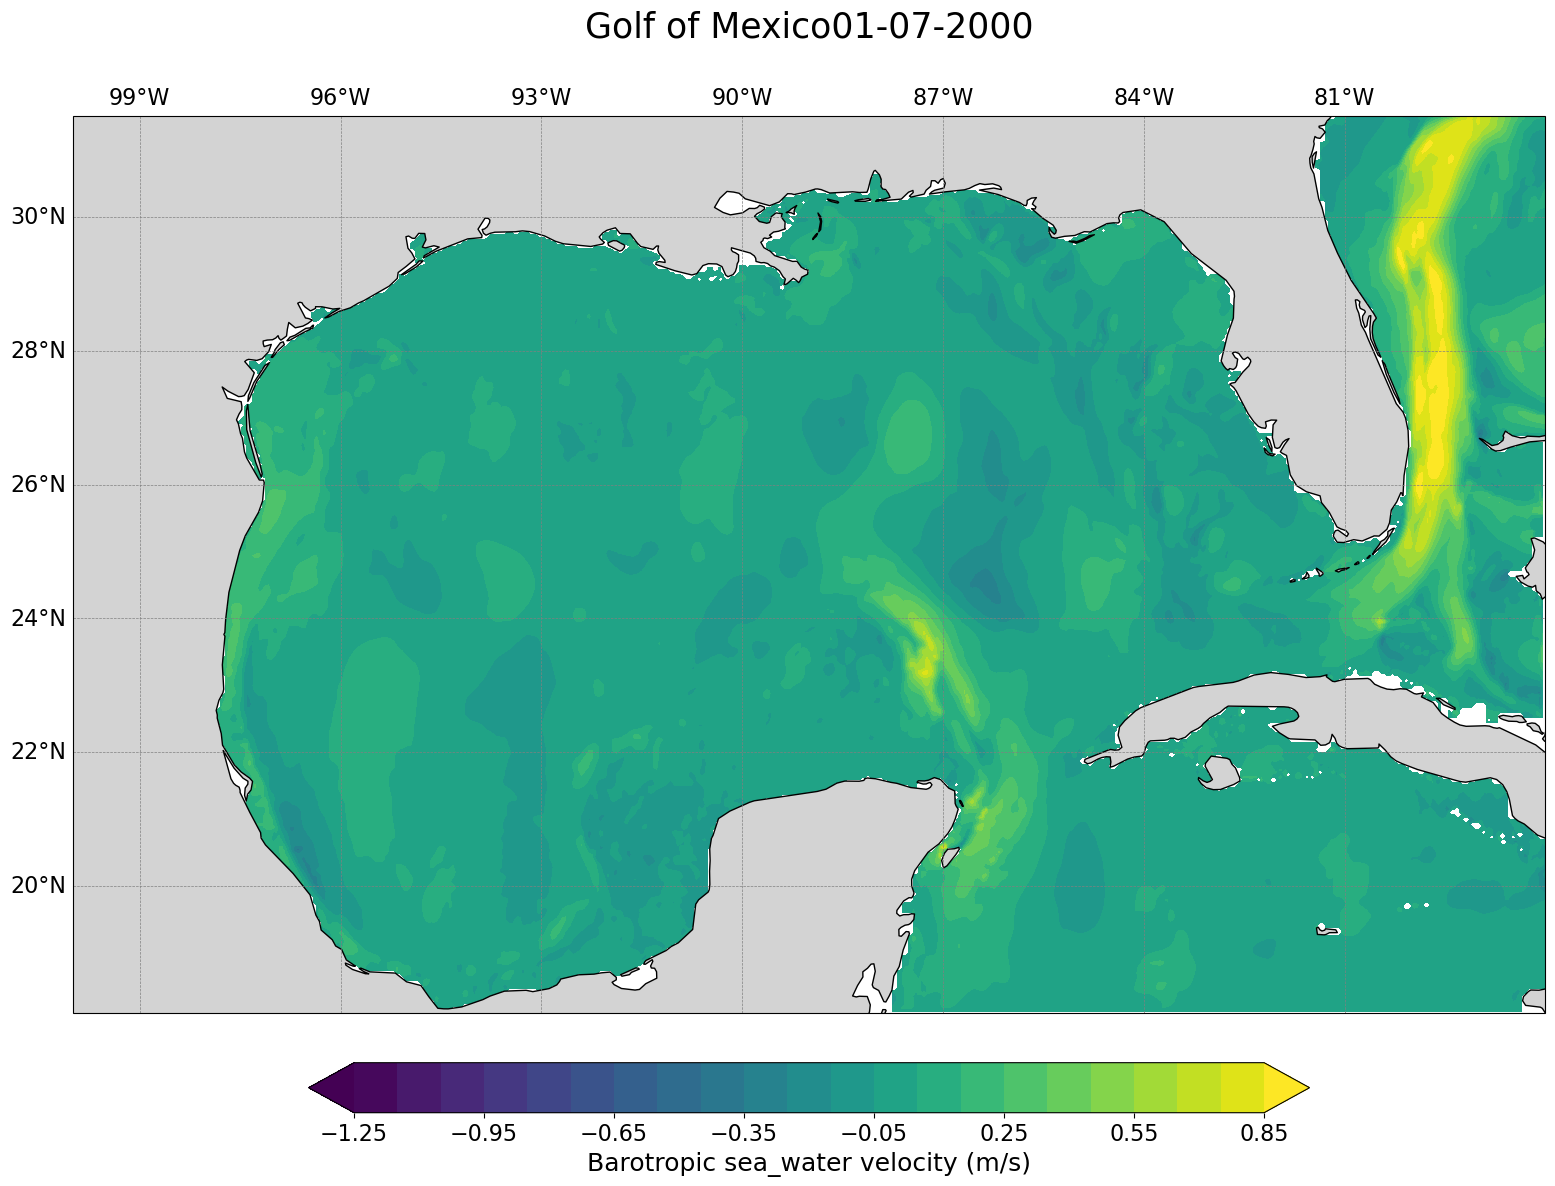

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


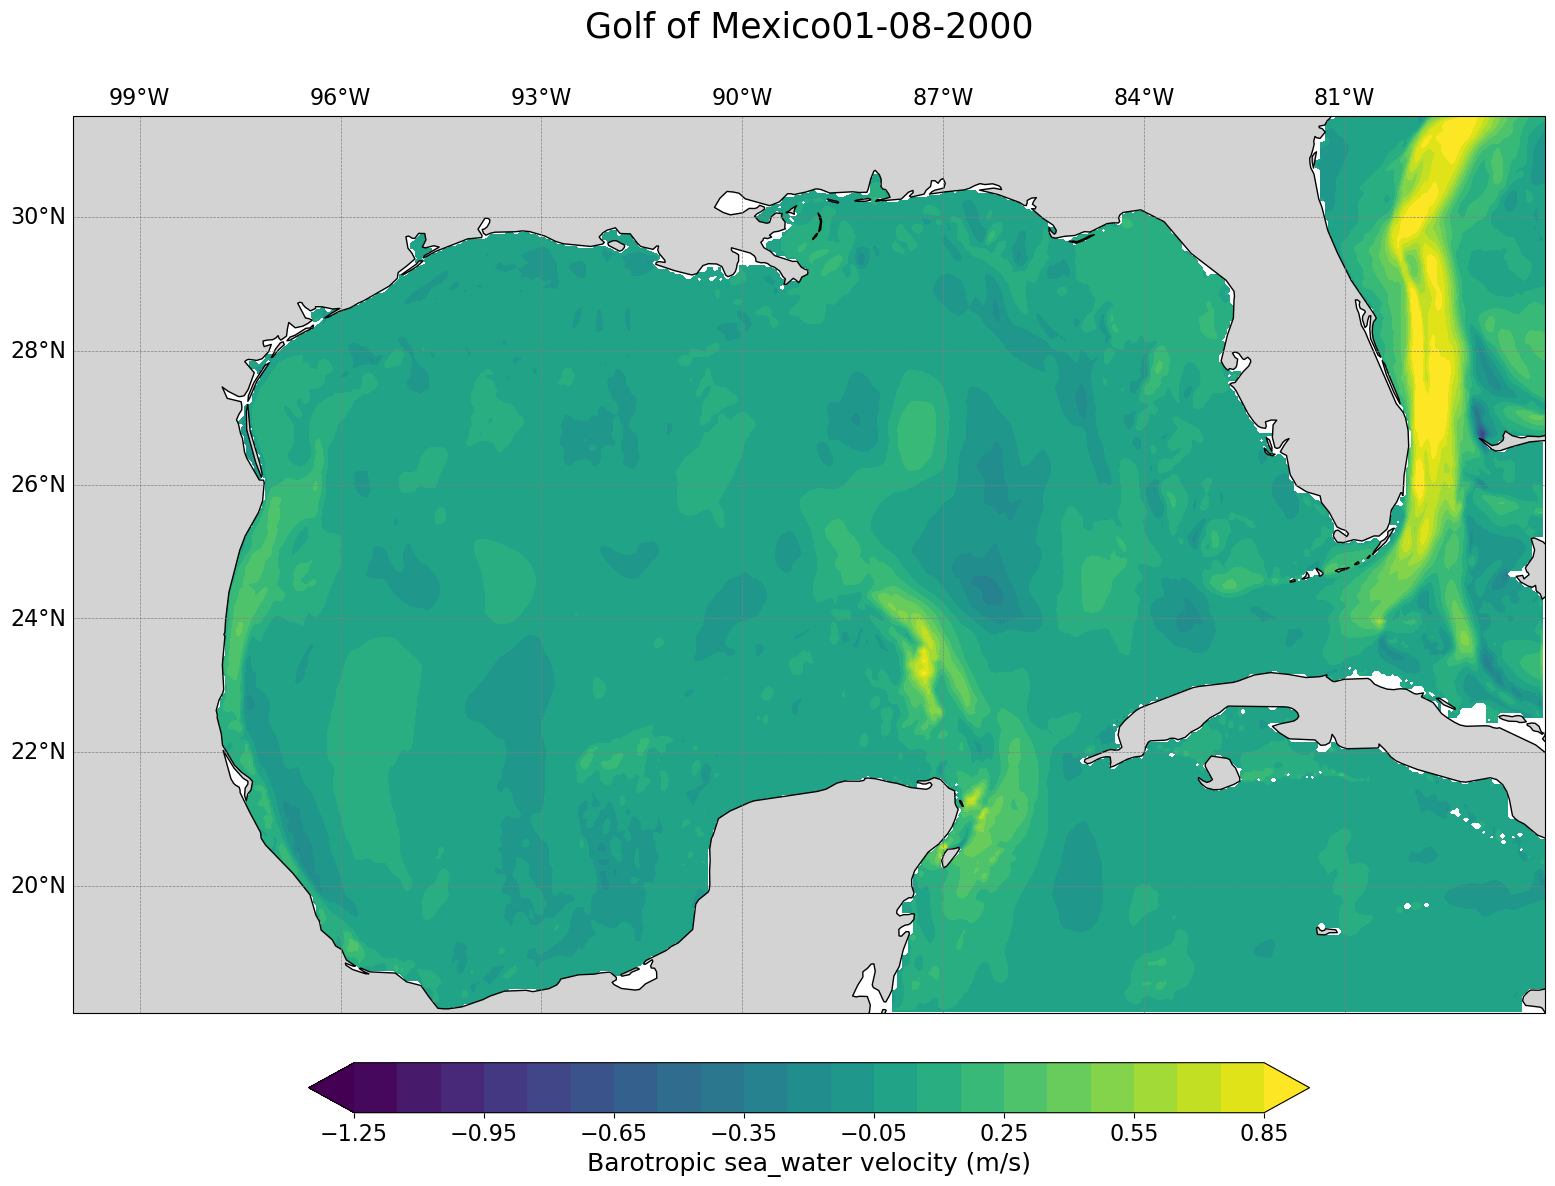

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


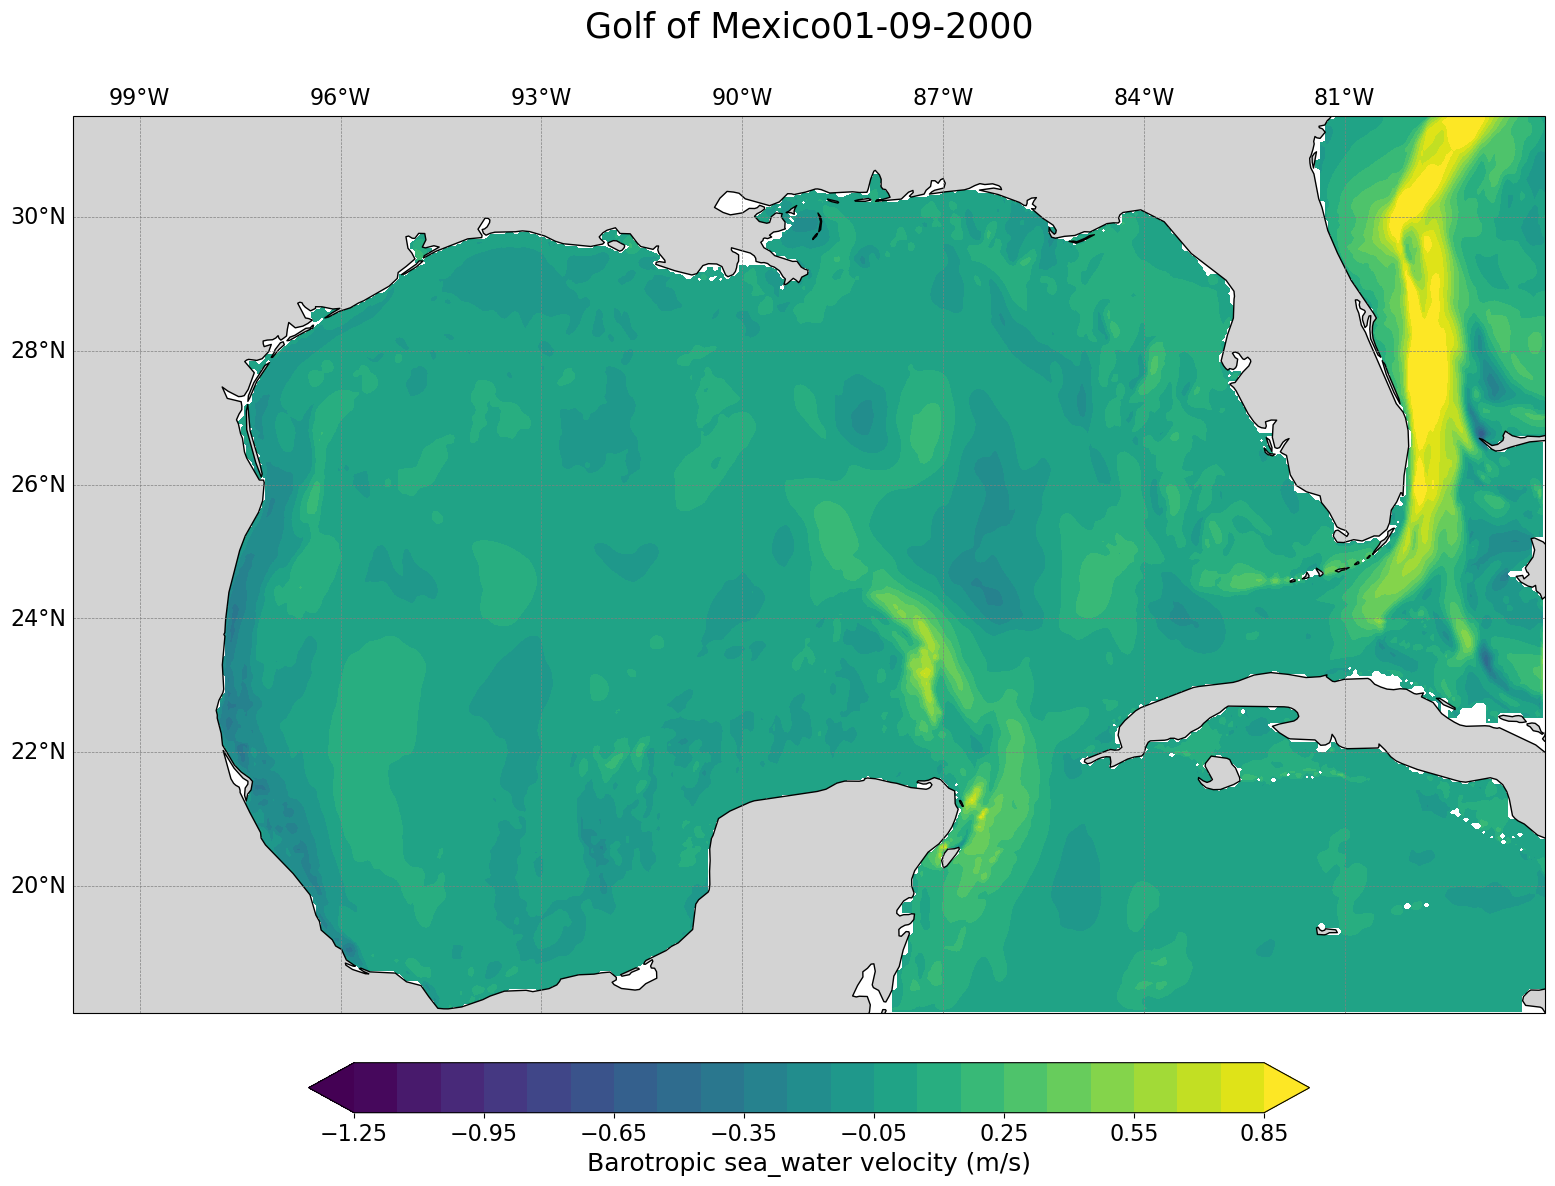

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


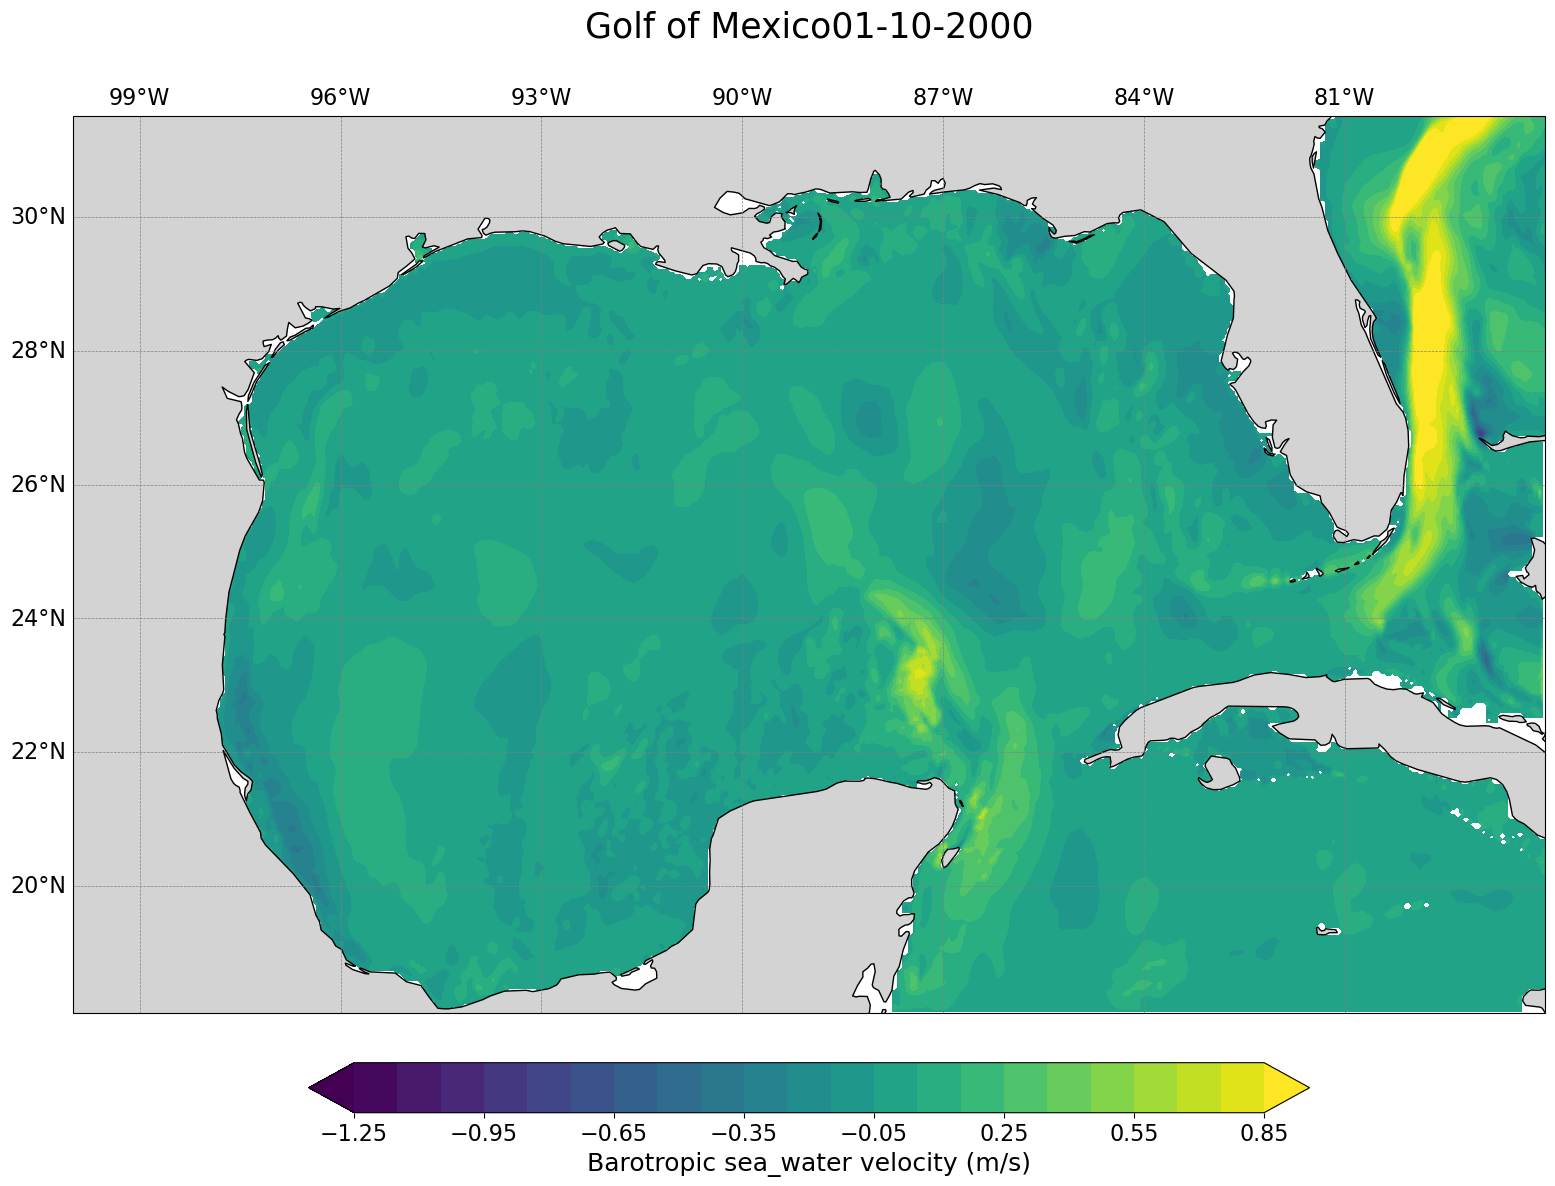

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


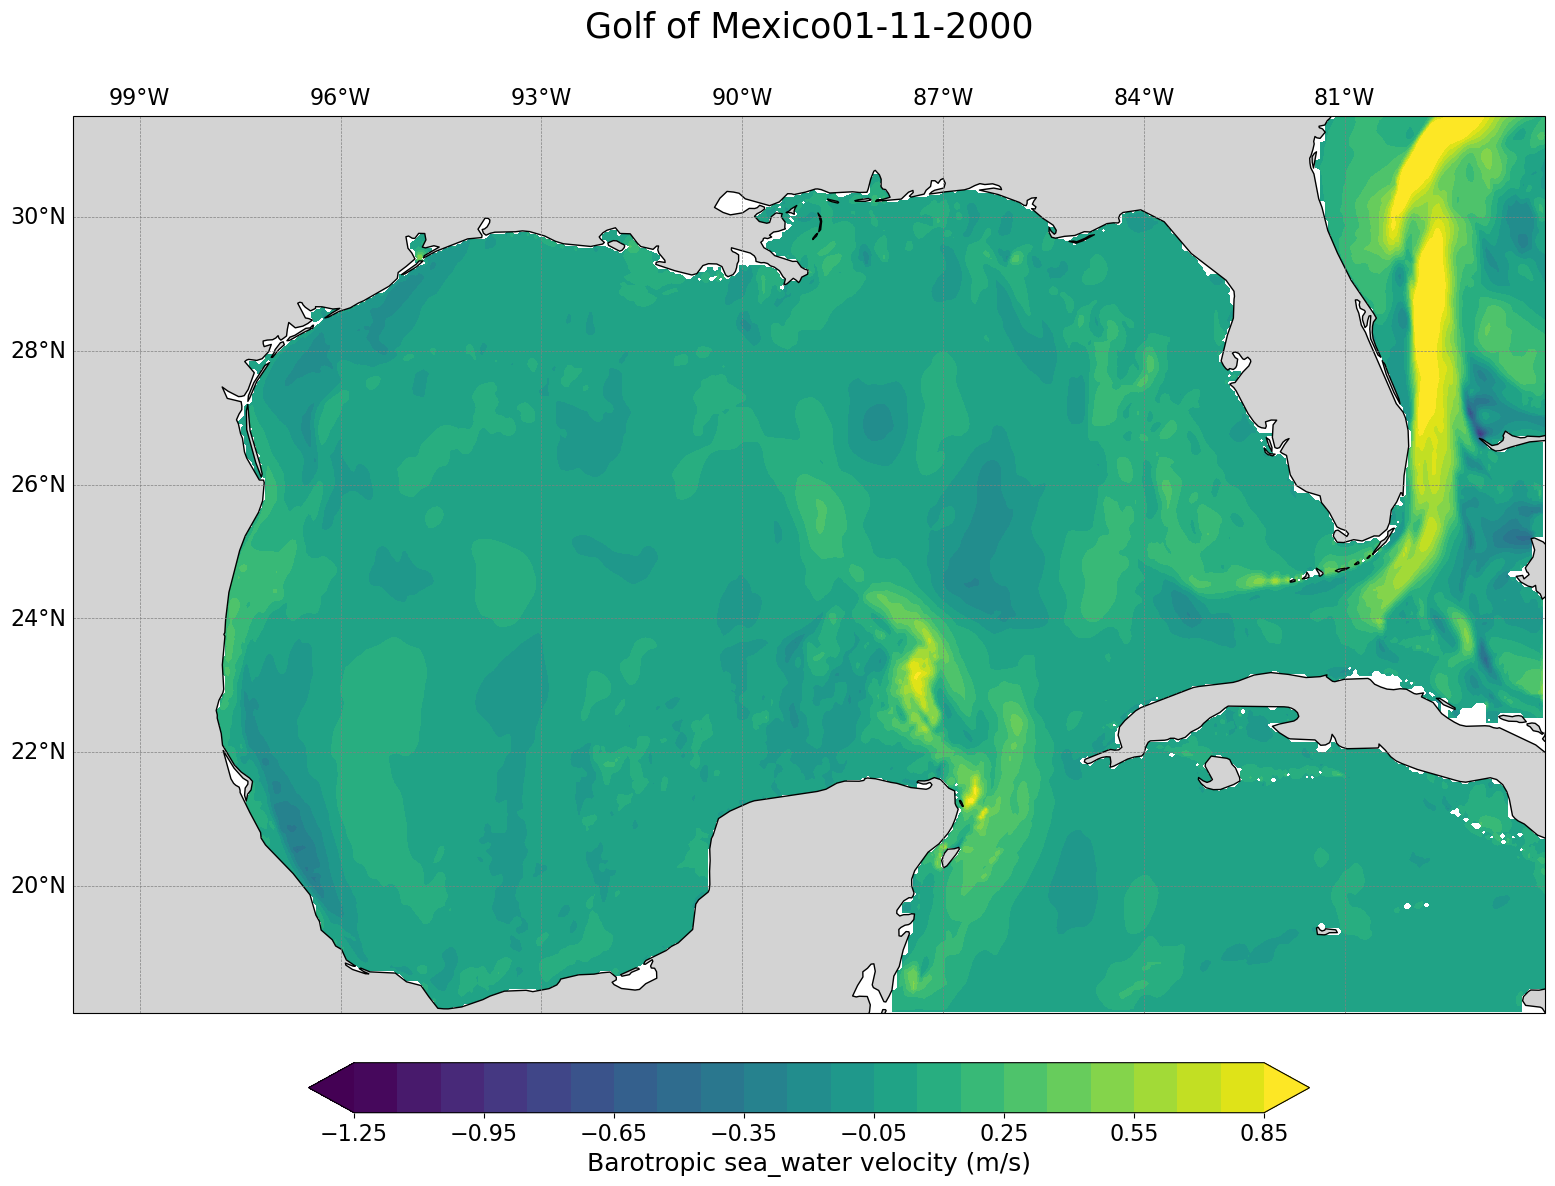

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


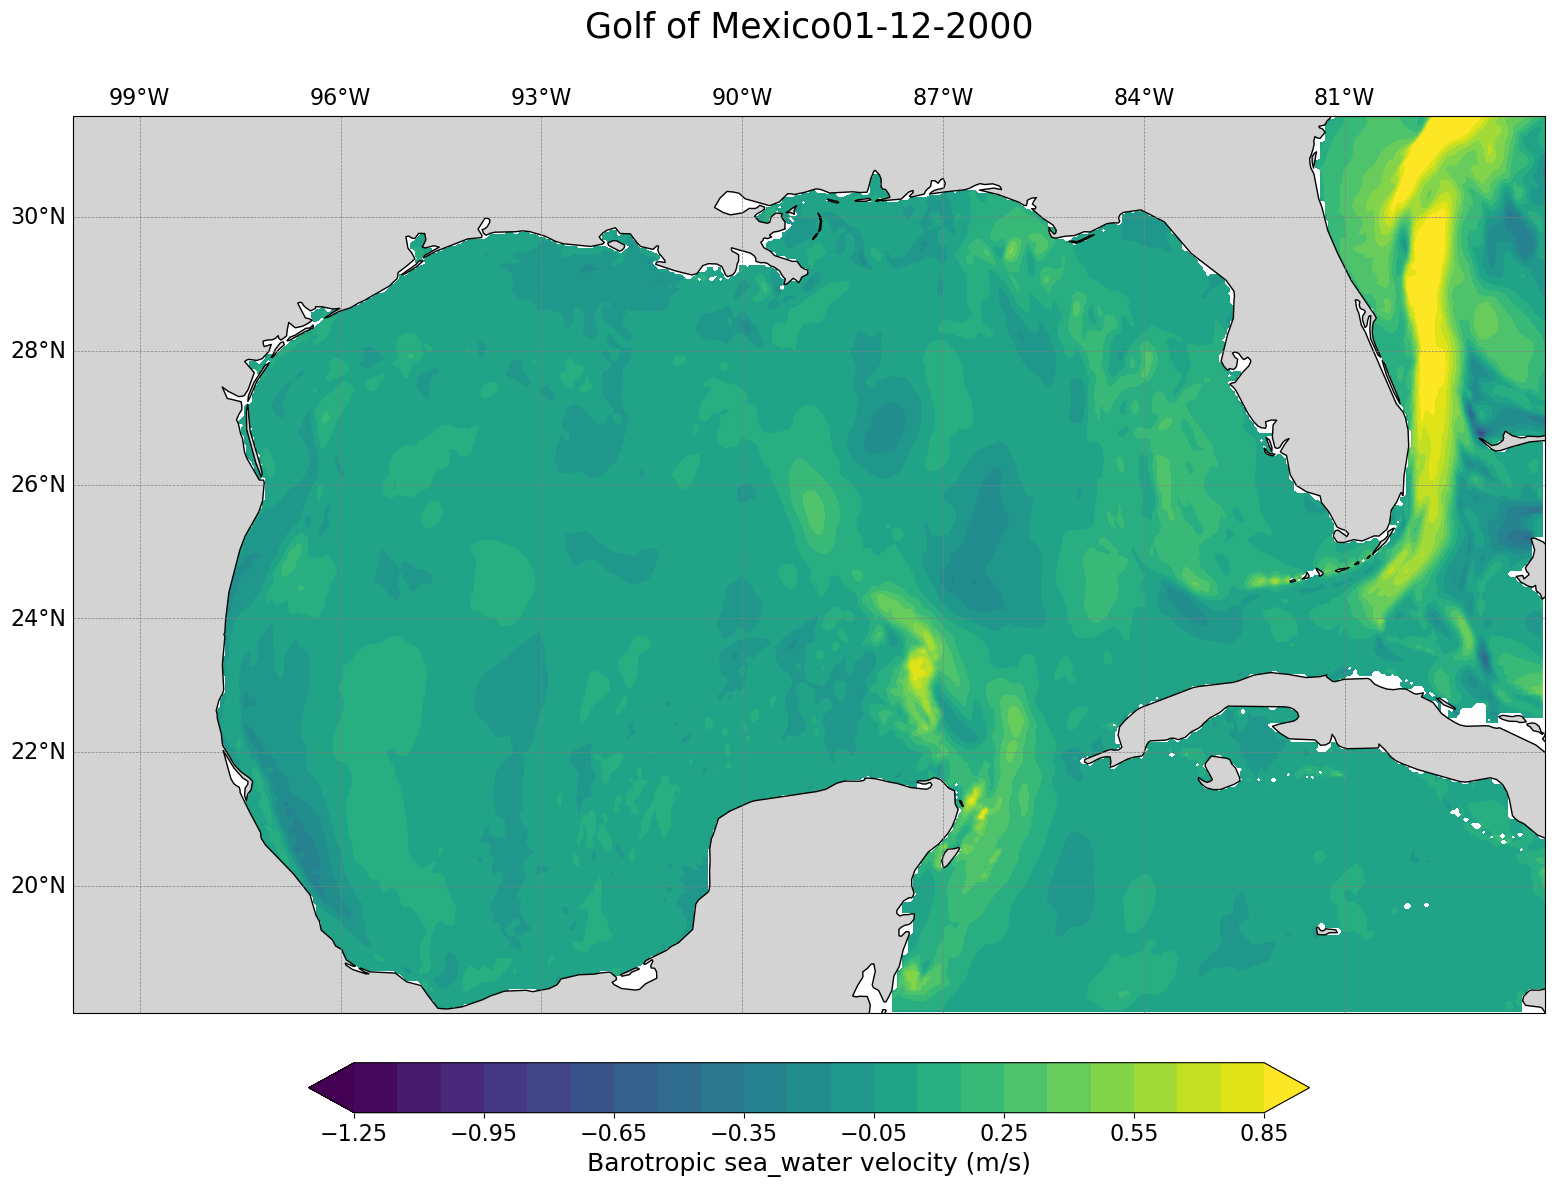

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


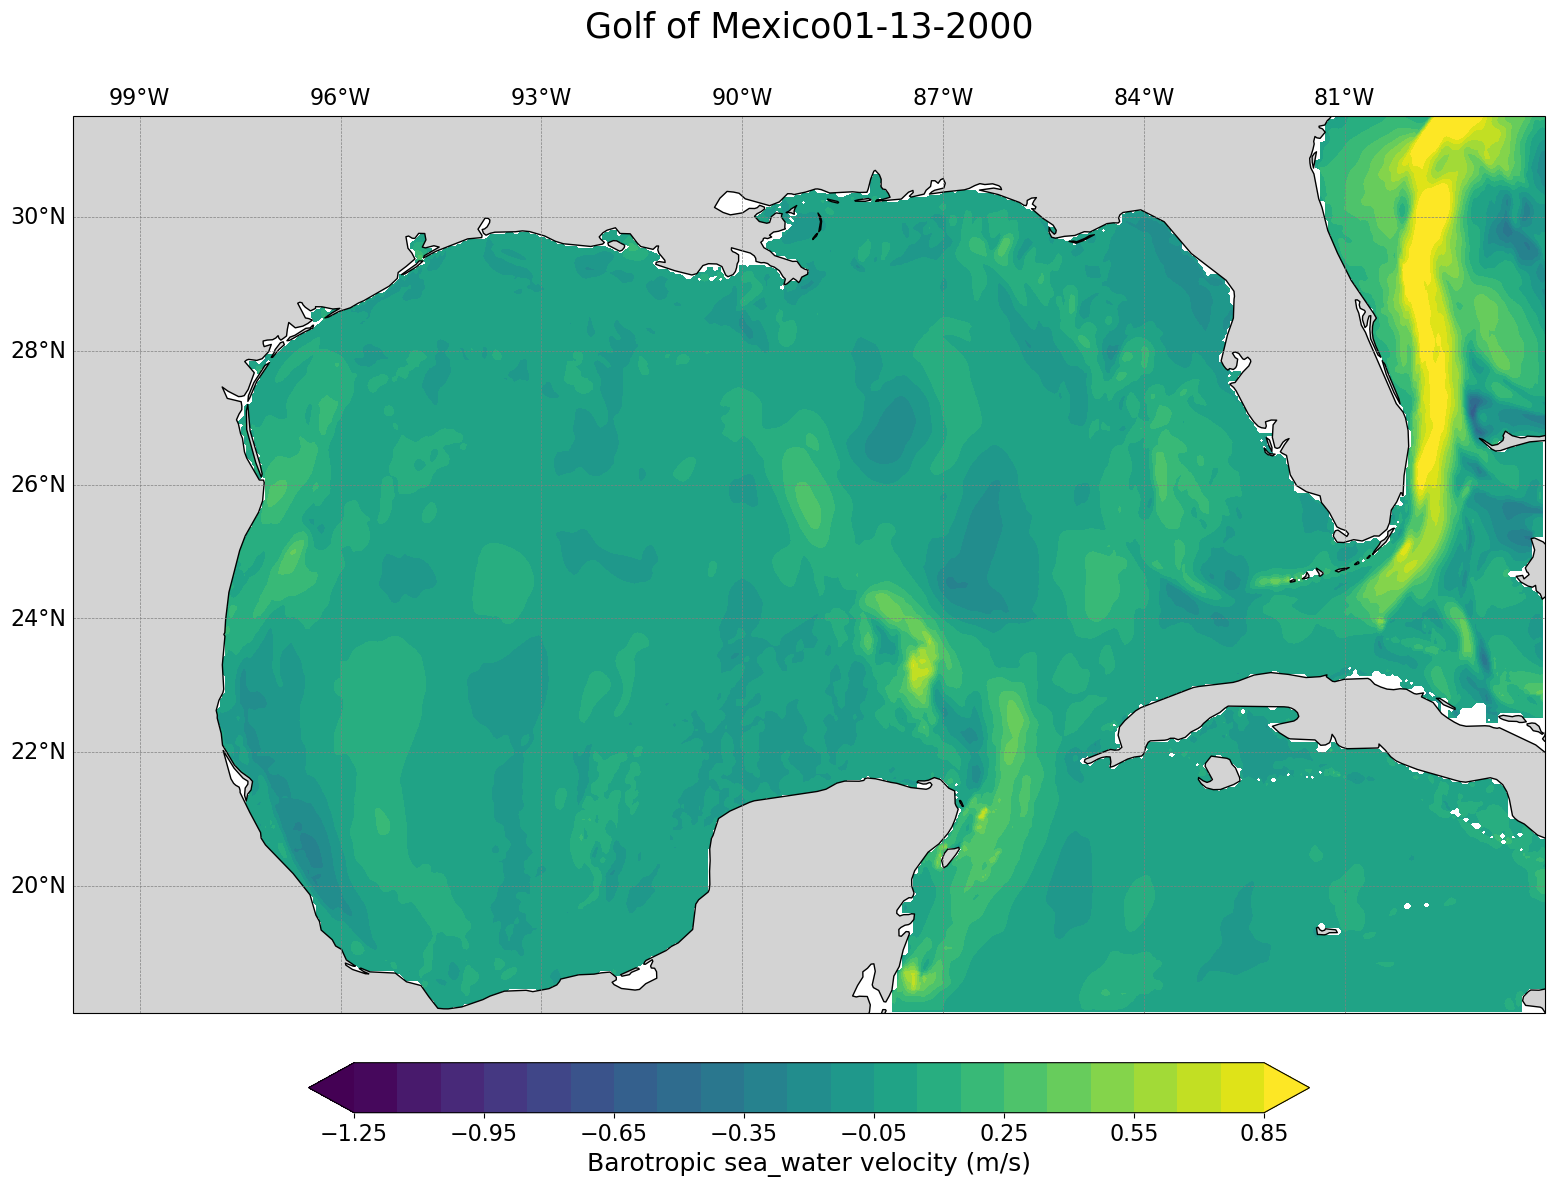

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


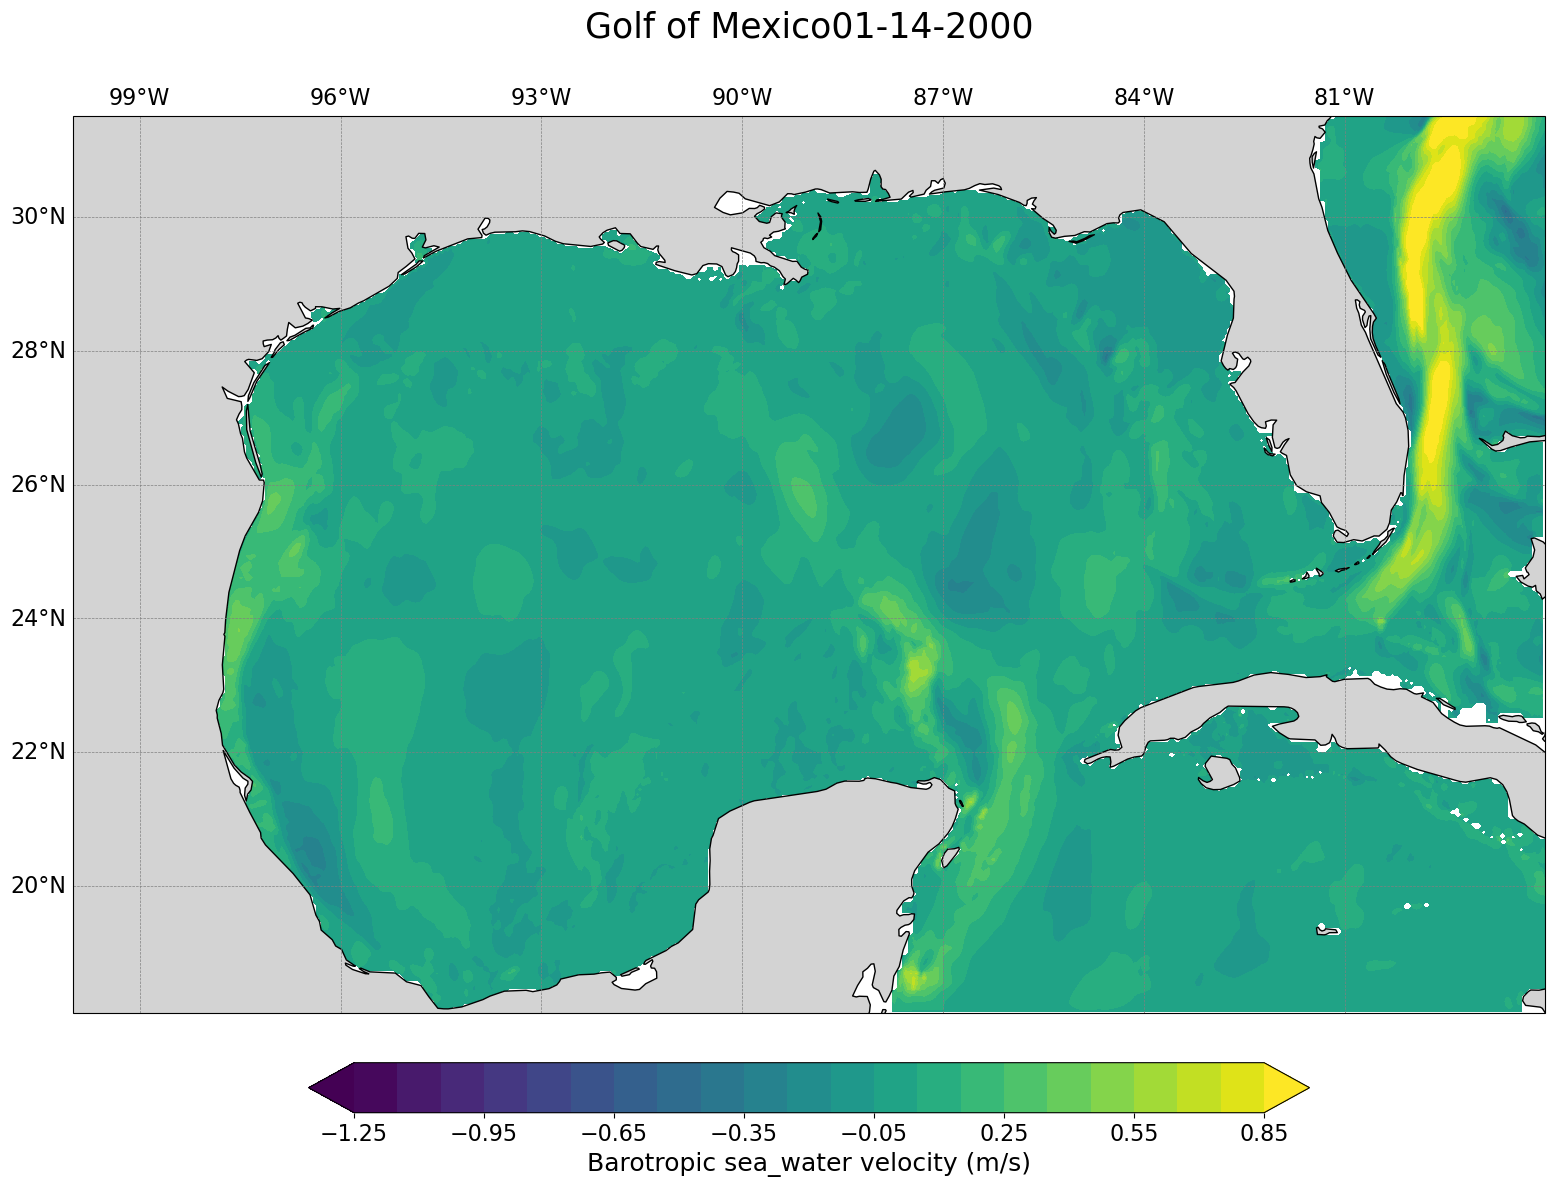

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


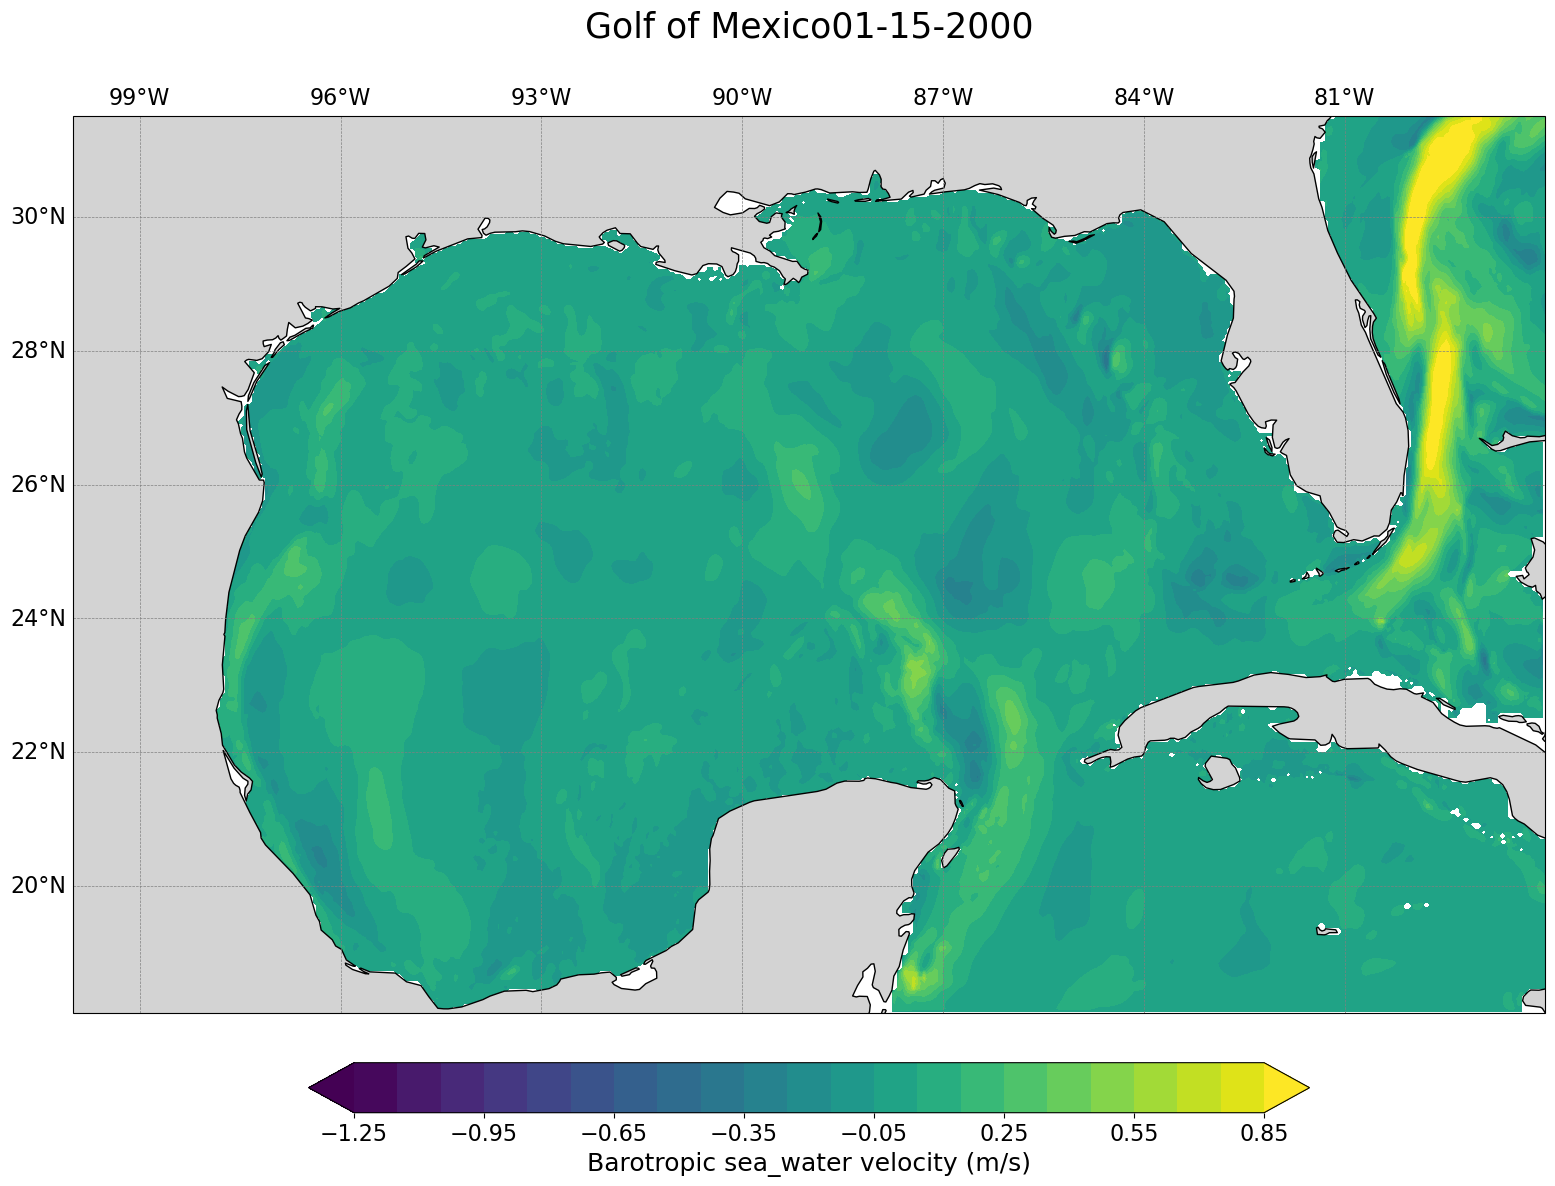

In [26]:
# We start off by looping through the amount of days we want to plot
#Retrieve the dates each is a file
for date_index in range(1,number_of_days+1):
    #Open open the data for the day that we are looking at 
    link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_"+str(date_index).zfill(3)+"_01_2d.nc"
    data = xr.open_dataset(link, decode_times=False)
    
    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([260,282, 18.11, 31.5])

    #set variables from the data that will be plotted onto the map
    var = data.v_barotropic_velocity[0,:,:] 
    x, y =data.Longitude, data.Latitude

    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels,extend='both')#,N=7)

    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05,extend='bith')
    cbar.set_label("Barotropic sea_water velocity (m/s)" , size = 18)

        #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)

    #Sets the graph title and format the size and location of the title
    ax.set_title('Golf of Mexico'+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)

        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
    #Save the plot in the given location and name, with the extension of the date
    fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', dpi = 500)
 
    
    #Increment the date, as we go through to the next file so it matches up with the correct time
    date = date + timedelta(days=1)

**Result** I process the images in https://ezgif.com/maker to create the movie.See the output below:

In [32]:
from IPython.core.display import Image
Image(url= 'https://github.com/chsharrison/Sci_comp_F24/tree/main/Mariam_Valladares/Sea_velocity.gif')